The aim of this chapter is to illustrate how economic models can be used to understand, communiciate and assess economic issues/policies.

In [2]:
import jax 
import jax.numpy as jnp 
import matplotlib.pyplot as plt 
from functools import partial

### **Motivating Quote**

> A model's power stems from the elimination of irrelevant detail, which allows the economist to focus on the essential features of the economic reality he or she is attempting to understand -- Hal Varian

### **Constructing a Model**
Can you construct a model to help you understand an some Economic relationship?

We'll yes and no. To start with, in order to build a model you need to have some understanding of the issue/topic of interest so as to determine which aspects of reality don't need to be faithfully captured by the model. But in addition to that, an Economic model without any data is simply the the result of composing several of your own ideas together. So, does it help you understand an Economic reality, or does the act of creating a model help you better understand your own thoughts on the Economic reality? 


### **Discussion**

Hal writes in his textbook of the following two principles:
    
- **The Optimization Principle**: People try tp choose the best patterns of consumption that they can afford.
- **The Equilibrium Principle**: Prices adjust until the amount that people demand of something is equal to the amount that is supplied

To what extent is the second principle redundant? Could the first principle be made more general?

### **The First Model: Where Supply Meets Demand**

Let's say that we're back in the Spring of 2020 and that we're working for Petco, a company that produces dog food. Our manager comes to us and asks us to model how a shutdown for several months might affect the dog food market. 

- **Understand**: Prior to the spring of 2022, we might not ever considered how a partial shutdown of society might affect aspects of the economy. To tackle this question we're going to use a model to "work through" what might happen.

- **Communicate**: Our model will also be a way in which we can communicate our beliefs to others. 

- **Assess**: Our manager might come back to usk to "simulate" how one firm policy might fare compared to another. For instance, they might ask us to determine whether they should shut down some of the production sites.

Let's starting with understanding how a partial shutdown might affect things. There'e the demand for dog food -- how much people are willing to pay for it at a given price, and the supply of dog food -- how much firms are willing to produce at a given price. We can represent these two notions succinctly with a [function](../math/function.ipynb).

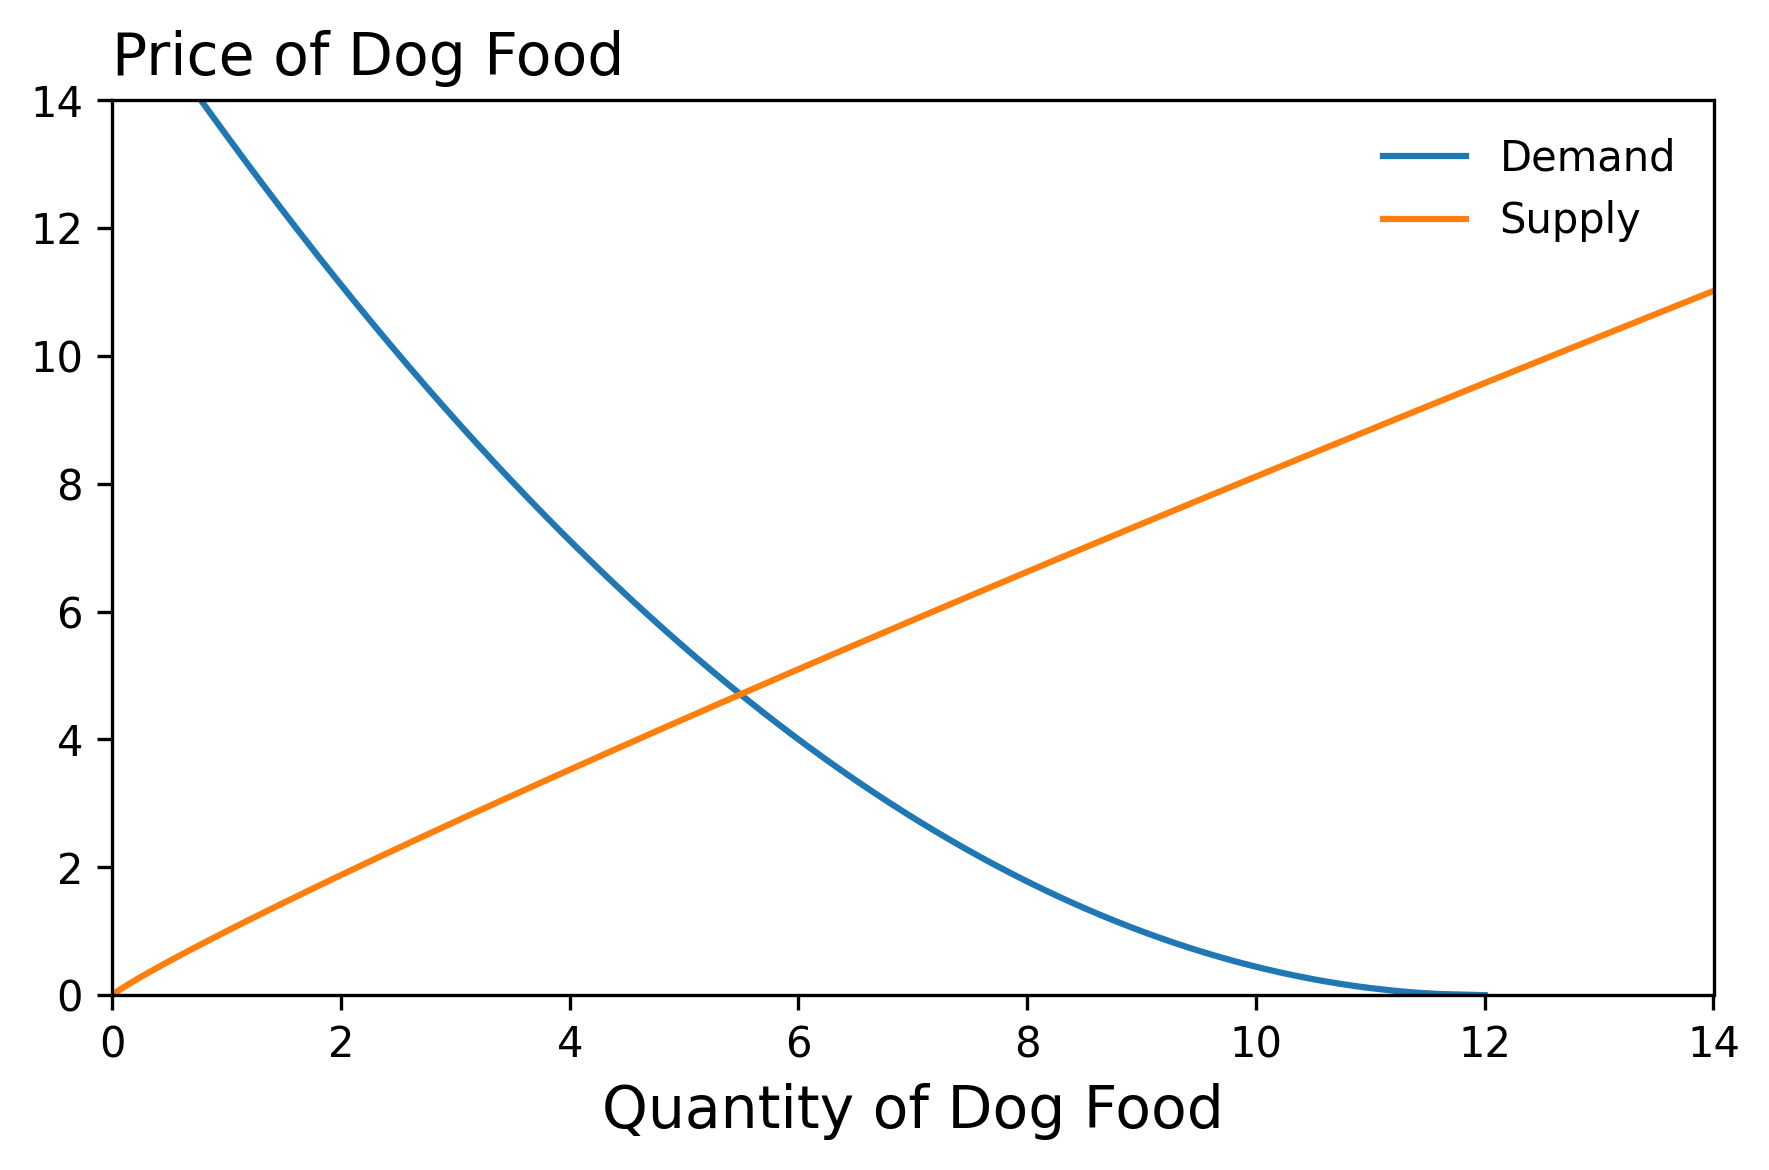

In [25]:
def quantity_demanded_dog_food_fn(price):
    return 12 - 3*jnp.sqrt(price)

def quantity_supplied_dog_food_fn(price):
    return price**(1.1)

prices_dog_food = jnp.linspace(0, 18, 1000)
quantity_demanded_dog_food = quantity_demanded_dog_food_fn(prices_dog_food)
quantity_supplied_dog_food = quantity_supplied_dog_food_fn(prices_dog_food)

fig = plt.figure(dpi=300, tight_layout=True)
plt.plot(quantity_demanded_dog_food, prices_dog_food, label='Demand')
plt.plot(quantity_supplied_dog_food, prices_dog_food, label='Supply')
plt.title('Price of Dog Food', loc='left', size=14)
plt.xlabel('Quantity of Dog Food', size=14)
plt.legend(frameon=False)
plt.xlim(0, 14)
plt.ylim(0, 14)
plt.show()



We decide to approach this in three steps. First we'll model the demand for dog food, then well model the supply before putting these pieces together to get a rough picture/understanding of the entire market. 

#### Demand
We know that quantity demanded is a function of price. When price increase, the quantity demanded falls. 
$$Q_{\text{demand}} = f(\text{price})$$
With the pandemic, the relationship remains, but we now want to think about how social distancing and remote work might affect the demand for dog food. To do so, we augment our demand function to include the months of the pandemic as an argument. 

$$\begin{aligned}
Q_{\text{dogs}} &= g(\text{price}, \textrm{months}) \\\\ 
Q_{\text{dog_food}} &= f(\text{price}, \textrm{months}) \\\\ 
 f(\text{price}, \textrm{months}) &= h(g(\text{price}, \textrm{months}) , \text{price})\end{aligned}$$

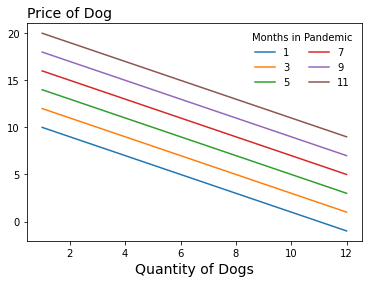

In [30]:

def q_dog(price_dog_food, months):
    return 10 - price_dog_food + months
for i in range(1, 12, 2):
    xs = jnp.linspace(1, 12, 100)
    ys = partial(q_dog, months=i)(xs)
    plt.plot(xs, ys, label=i)
plt.title('Price of Dog', loc='left', size=14)
plt.xlabel('Quantity of Dogs', size=14)
plt.legend(frameon=False, title='Months in Pandemic', ncol=2)
plt.show()


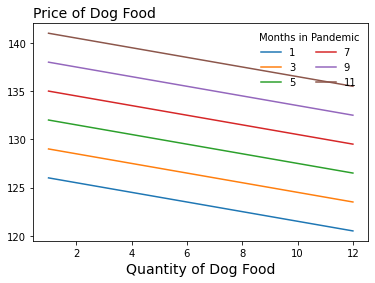

In [38]:
def q_dog_food(price_dog_food, months):
    num_dogs = q_dog(price_dog_food, months)
    return 120 + 0.5*num_dogs + months

for i in range(1, 12, 2):
    xs = jnp.linspace(1, 12, 100)
    ys = partial(q_dog_food, months=i)(xs)
    plt.plot(xs, ys, label=i)
plt.title('Price of Dog Food', loc='left', size=14)
plt.xlabel('Quantity of Dog Food', size=14)
plt.legend(frameon=False, title='Months in Pandemic', ncol=2)
plt.show()

### What if ...

We can now ask our selves questions such as, what if staying at home not only changes one's willingness to have a dog, but also their willingness to pay for daily expenses of owning a dog. Specifically, what if $g$ changes as a result of the pandemic? 